In [165]:
#import libraries
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt 

In [166]:
import warnings 
warnings. filterwarnings('ignore')

In [167]:
#initialize data, perform linear regression

#define constants
n = 500
m = 11
mu = 0
#sigma_2 = 5
#sigma = np.sqrt(sigma_2)

#create matrices for storing data
x = np.zeros(n)
y = np.zeros(n)

def lineardatagenerator(n):
    random = np.random.uniform(0,1)
    noise = sigma*np.random.randn(n)
    x = np.random.rand(n)
    y = 36 * x + noise
    return x, y

def designmatrix(x_input,m):
    X = np.vstack([np.ones(np.size(x_input))]).T
    for i in range(m):
        X = np.vstack([X.T, x_input**(i+1)]).T
    return X

def designvector(x_input,m):
    dvector = np.vstack([1]).T
    for i in range(m):
        dvector = np.vstack([dvector.T, x_input**(i+1)]).T
    return dvector
    
def kernelfunction(x_i, x_value, index, m):
    dmatrix = designmatrix(x_i, m)
    dvector = designvector(x_value, m)
    kernel =  dvector @ np.linalg.inv(dmatrix.T @ dmatrix) @ dmatrix[:][index]
    return kernel

In [168]:
# k as a function of x, x_i
np.random.seed(seed=4803)
scalefactor = 1

x_i = 2*scalefactor*np.random.rand(n) - scalefactor

values = np.arange(-1,1, 0.01)

kernels = np.zeros((len(values),n))

for i in range(len(values)):
    for j in range(n):
        kernels[i][j] = kernelfunction(x_i, values[i], j, m)

Text(0.5, 0, 'K(x,x_i)')

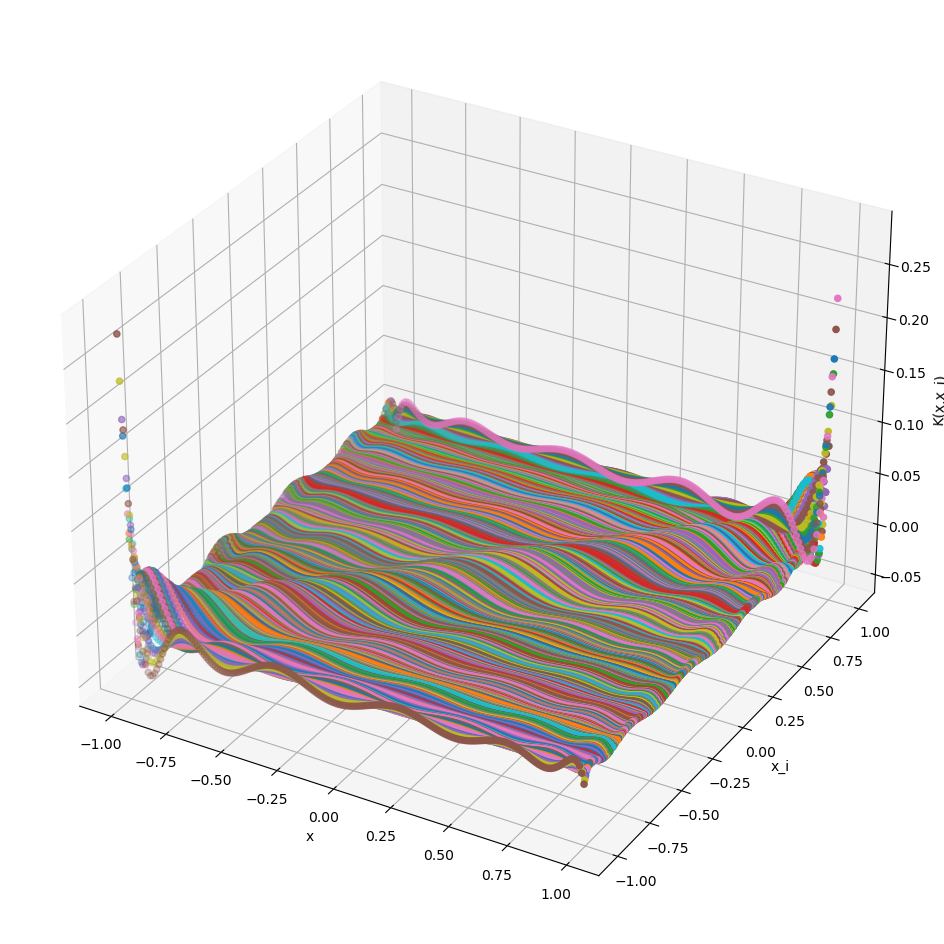

In [169]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(values, x_i[i], kernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

In [220]:
# k as a function of x, p
np.random.seed(seed=4803)
index = 25

mx_i = np.linspace(-1,1,50) 

mp = np.arange(1,15,1)

mvalues = np.linspace(-1,1,100) 

mkernels = np.zeros((len(mvalues),100))

for i in range(len(mvalues)):
    for j in range(len(mp)):
        mkernels[i][j] = kernelfunction(mx_i, mvalues[i], index, mp[j])

Text(0.5, 0, 'K(x,x_i)')

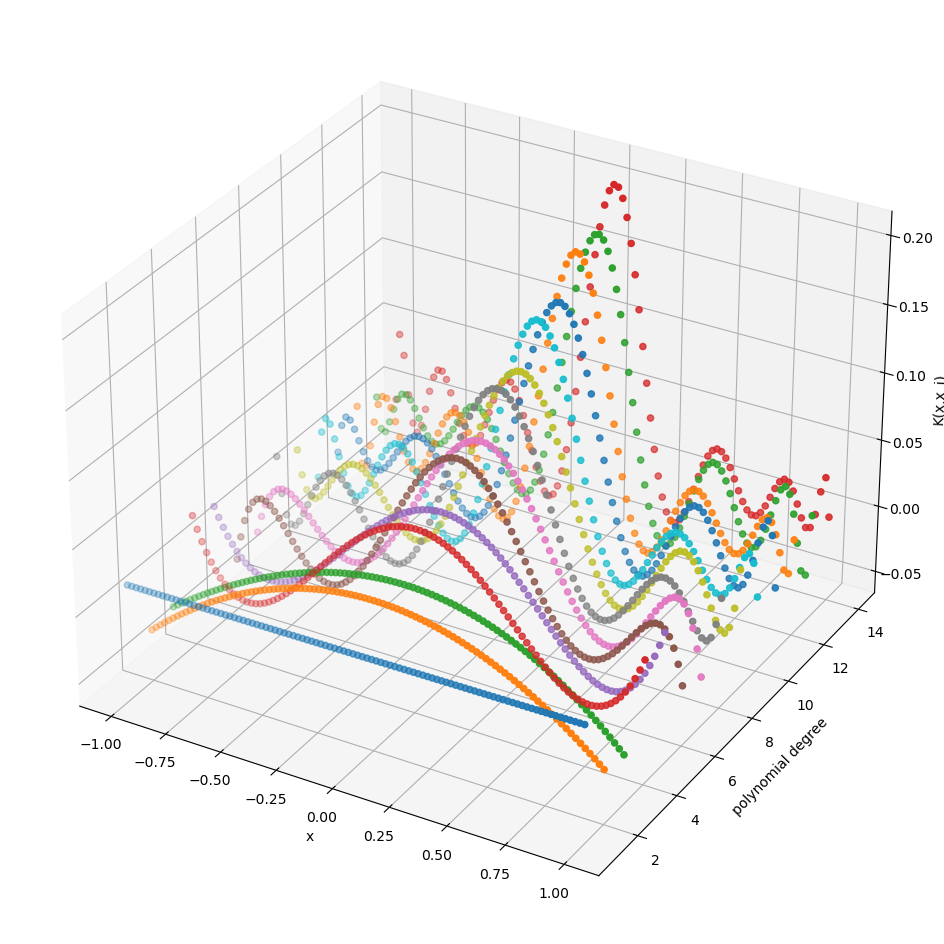

In [223]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(15-1):
    ax.scatter(mvalues, mp[i], mkernels[ :,i])
ax.set_xlabel('x')
ax.set_ylabel('polynomial degree')
ax.set_zlabel('K(x,x_i)')

In [172]:
np.random.seed(seed=4803)
scalefactor = 5

nx_i = np.linspace(-1,1,n) 

nvalues = np.arange(-1,1, 0.01)

nkernels = np.zeros((len(nvalues),n))

for i in range(len(nvalues)):
    for j in range(n):
        nkernels[i][j] = kernelfunction(nx_i, nvalues[i], j, m)

Text(0.5, 0, 'K(x,x_i)')

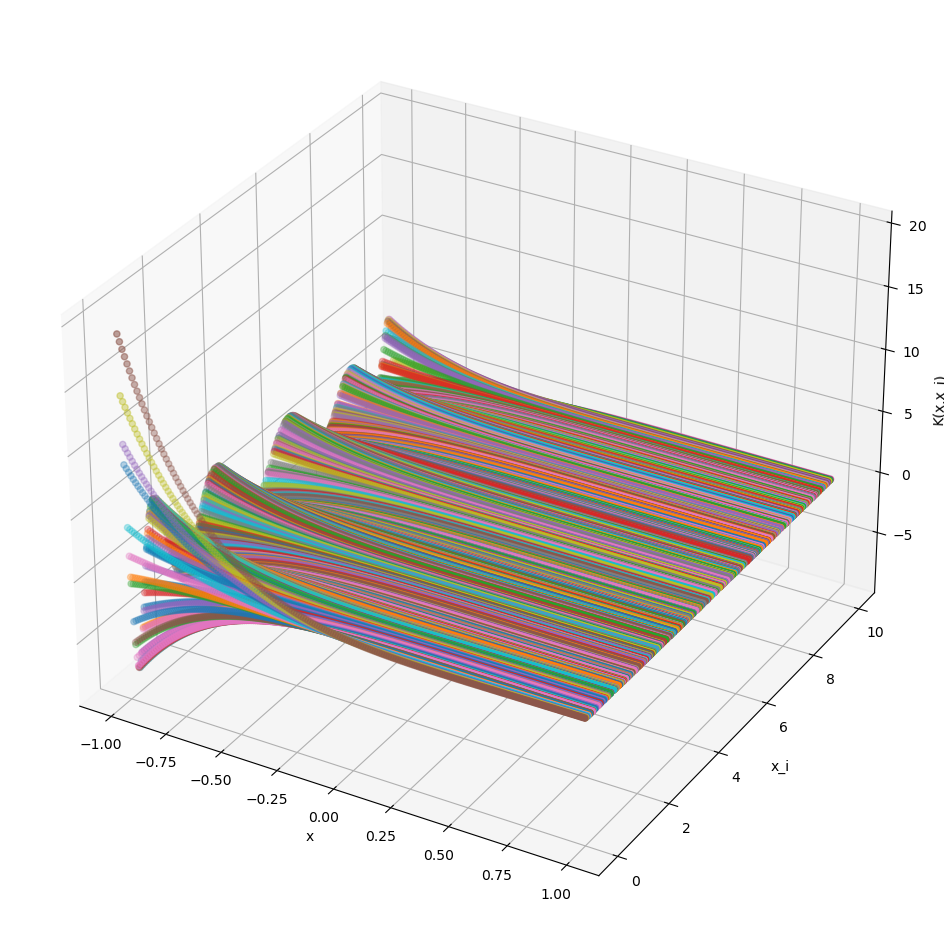

In [173]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(nvalues, nx_i[i], nkernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

In [174]:
def ridgekernelfunction(x, x_value, index, m, lmbda):
    dmatrix = designmatrix(x, m)
    dvector = designvector(x_value, m)
    kernel = dvector @ np.linalg.inv(dmatrix.T @ dmatrix + lmbda * np.identity(m+1)) @ dmatrix[:][index]
    return kernel

In [175]:
np.random.seed(seed=4803)
scalefactor = 1
polydeg1 = 11

rx = np.linspace(-1,1,n)

rvalues = np.linspace(-scalefactor,scalefactor, n)

rkernels = np.zeros((len(rvalues),n))

for i in range(len(rvalues)):
    for j in range(n):
        rkernels[i][j] = ridgekernelfunction(rx, rvalues[i], j, m, 4)

Text(0.5, 0, 'K(x,x_i)')

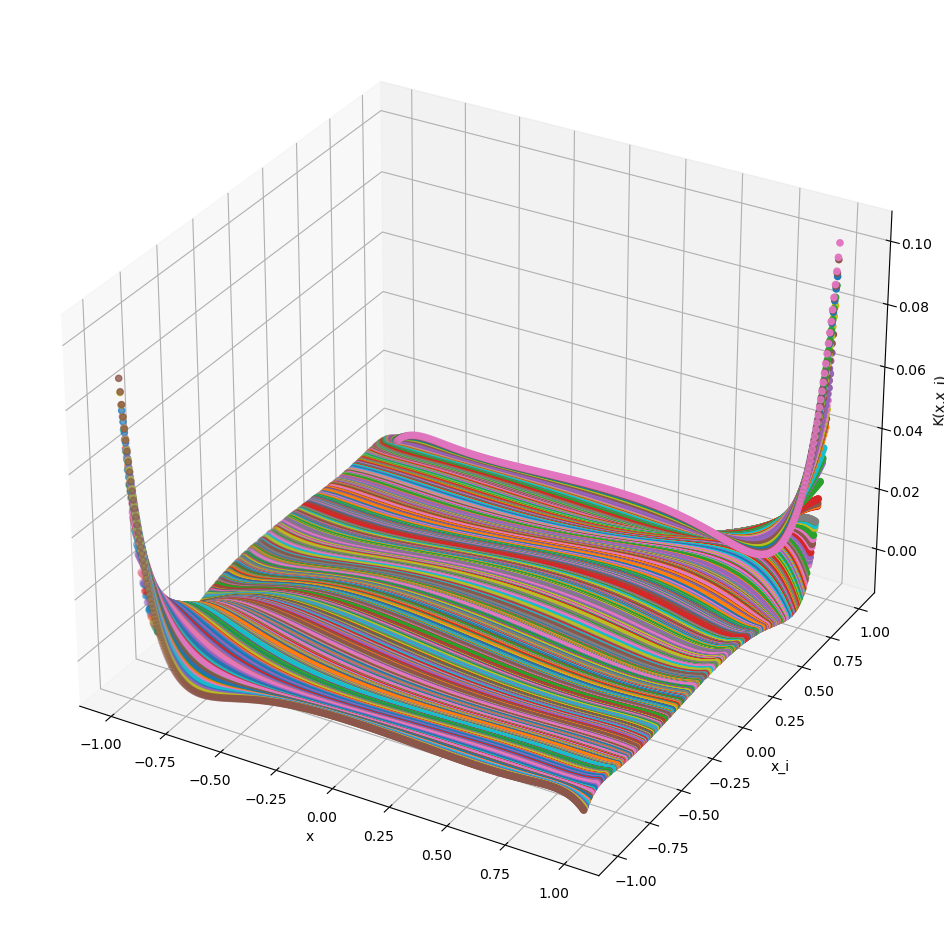

In [176]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(rvalues, rx[i], rkernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

In [179]:
index = 250
scalefactor = 1

rlx = np.linspace(-1,1,n)

rlambda = np.linspace(0,0.05,500)

rlvalues = np.linspace(-1,1, n)

rlkernels = np.zeros((len(rlvalues),len(rlambda)))

for i in range(len(rlvalues)):
    for j in range(len(rlambda)):
        rlkernels[i][j] = ridgekernelfunction(rlx, rlvalues[i], index, m, rlambda[j])

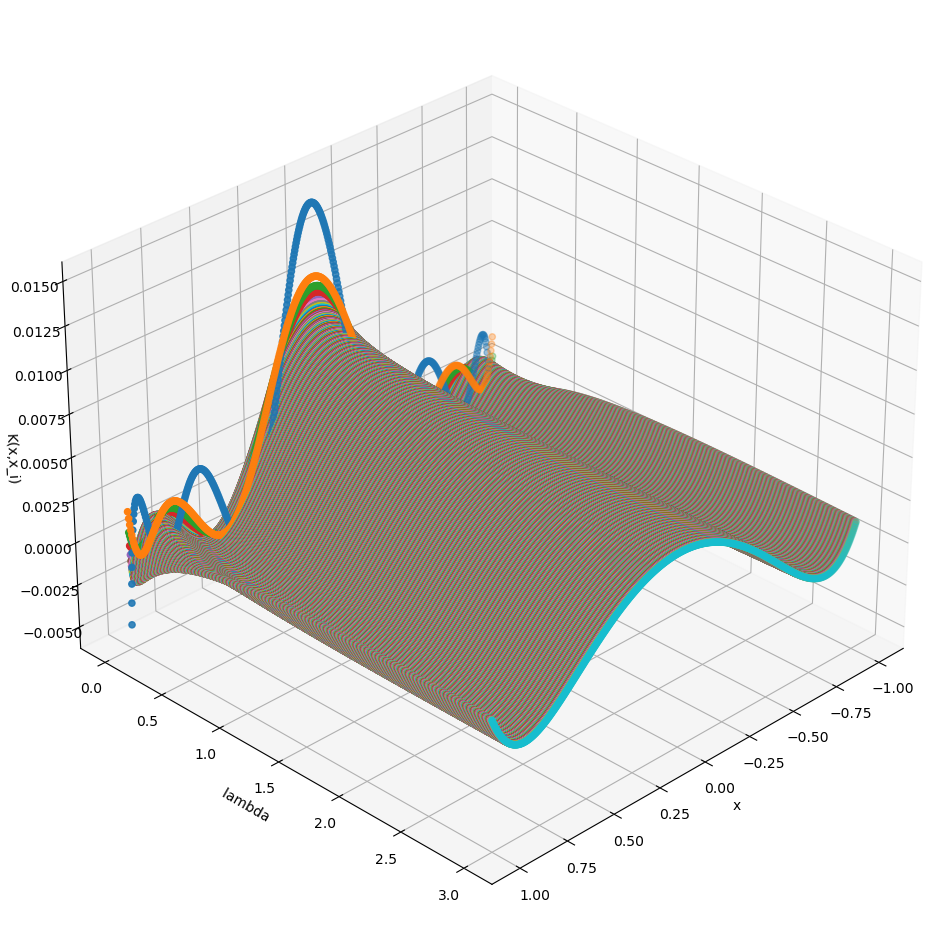

In [224]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(len(rlambda)):
    ax.scatter(rlvalues, rlambda[i], rlkernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('lambda ')
ax.set_zlabel('K(x,x_i)')
ax.view_init(elev=30, azim=45, roll=0)